In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import normalize
from tensorflow.keras.regularizers import L2
from tensorflow import convert_to_tensor

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
#You can get the list in keras documentation
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Snekaer", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Ankle boot'

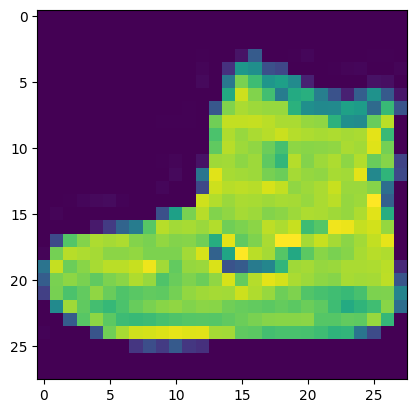

In [8]:
plt.imshow(X_train[0])
plt.show()

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((48000, 28, 28), (48000,), (12000, 28, 28), (12000,))

In [12]:
model = Sequential()

l2 = L2(l2=0.02)
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2))
model.add(Dense(256, activation='relu', kernel_regularizer=l2))
model.add(Dense(128, activation='tanh', kernel_regularizer=l2))
model.add(Dense(80, activation='relu', kernel_regularizer=l2))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
X_train = convert_to_tensor(X_train)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30, batch_size=150, verbose=1)

Epoch 1/30
320/320 [==============================] - 17s 46ms/step - loss: 3.6009 - accuracy: 0.6902 - val_loss: 1.3101 - val_accuracy: 0.7287
Epoch 2/30
320/320 [==============================] - 7s 22ms/step - loss: 1.2027 - accuracy: 0.7580 - val_loss: 1.1293 - val_accuracy: 0.7707
Epoch 3/30
320/320 [==============================] - 8s 24ms/step - loss: 1.1038 - accuracy: 0.7730 - val_loss: 1.0429 - val_accuracy: 0.7892
Epoch 4/30
320/320 [==============================] - 6s 19ms/step - loss: 1.0448 - accuracy: 0.7819 - val_loss: 0.9885 - val_accuracy: 0.8038
Epoch 5/30
320/320 [==============================] - 8s 24ms/step - loss: 1.0101 - accuracy: 0.7855 - val_loss: 0.9515 - val_accuracy: 0.8075
Epoch 6/30
320/320 [==============================] - 6s 19ms/step - loss: 0.9757 - accuracy: 0.7944 - val_loss: 0.9403 - val_accuracy: 0.8084
Epoch 7/30
320/320 [==============================] - 8s 25ms/step - loss: 0.9528 - accuracy: 0.7954 - val_loss: 0.9264 - val_accuracy: 0.807

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (150, 784)                0         
                                                                 
 dense (Dense)               (150, 512)                401920    
                                                                 
 dense_1 (Dense)             (150, 256)                131328    
                                                                 
 dense_2 (Dense)             (150, 128)                32896     
                                                                 
 dense_3 (Dense)             (150, 80)                 10320     
                                                                 
 dense_4 (Dense)             (150, 10)                 810       
                                                                 
Total params: 577,274
Trainable params: 577,274
Non-trai

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss, test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.8023 - accuracy: 0.8148
0.8022924661636353 0.8148000240325928


In [17]:
X_new = X_test[:5]
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 113ms/step


In [18]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1, 1, 6])

In [19]:
for i in y_pred:
  print(class_names[i], end=' ')

Ankle boot Pullover Trouser Trouser Shirt 

In [20]:
y = [class_names[y] for y in y_test[:5]]
print(*y)

Ankle boot Pullover Trouser Trouser Shirt


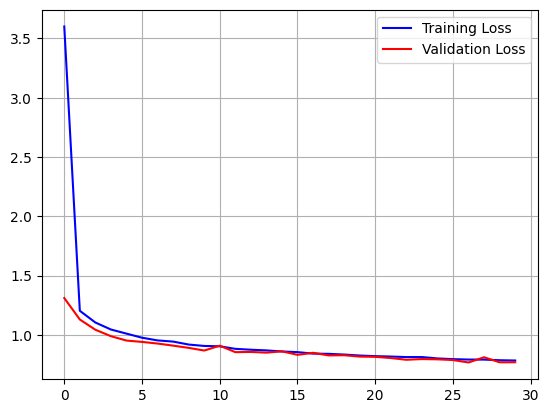

In [21]:
plt.plot(history.history['loss'], c='b', label='Training Loss')
plt.plot(history.history['val_loss'], c='r', label='Validation Loss')
plt.grid(True)
plt.legend(loc='best')
plt.show()

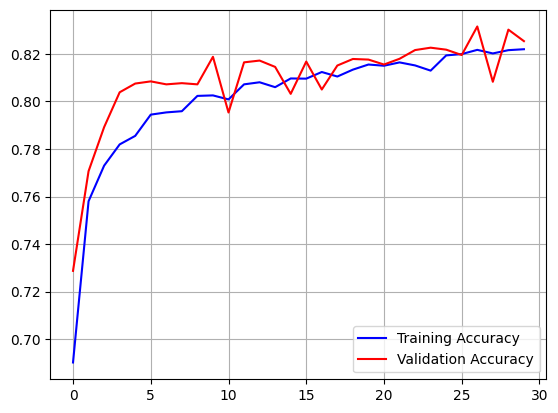

In [22]:
plt.plot(history.history['accuracy'], c='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], c='r', label='Validation Accuracy')
plt.grid(True)
plt.legend(loc='best')
plt.show()